## Cross-validation
<b>Cross-validation</b>  is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# This dataset, however, consists of only six types of quality values.
# We will thus map all quality values from 0 to 5.
q_map = sorted(list(set(df["quality"])))
print(q_map)

[3, 4, 5, 6, 7, 8]


In [13]:
quality_mapping = {}
idx = 0
for elem in q_map:
    quality_mapping[elem] = idx
    idx += 1
print(quality_mapping)

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}


<h3>iloc vs loc</h3>

- loc selects rows and columns with specific labels 
- df.loc["A"],df.loc[1]
- iloc selects rows and columns at specific integer positions
- df.iloc[1]

In [38]:
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.iloc[:]["quality"] = df.loc[:,"quality"].map(quality_mapping)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


# Data Spitting
- <b> use sample with frac = 1 to shuffle the dataframe </b> <br>
 df.sample? : Return a random sample of items from an axis of object.<br>
 n : int, optional<br>
 Number of items from axis to return. Cannot be used with `frac`.<br>
 Default = 1 if `frac` = None.<br>
 frac : float, optional<br>
 Fraction of axis items to return. Cannot be used with `n`<br>
 <b>Returns</b><br>
 Series or DataFrame<br>
    A new object of same type as caller containing `n` items randomly
    sampled from the caller object.<br>
Note : If `frac` > 1, `replacement` should be set to `True`.

In [54]:
# use sample with frac = 1to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.4,0.33,0.59,2.8,0.079,9.0,30.0,0.99760,3.12,0.54,12.0,3
1,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,2
2,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,3
3,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,3
4,9.9,0.35,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,4
1595,6.0,0.51,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,3
1596,9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,2
1597,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,3


In [55]:
# top 1000 rows are selected for training
df_train = df.head(1000)
# bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [73]:
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)
# choose the columns you want to train on, these are the features for the model
cols = list(df.columns)[:-1]

# train the model on the provided features and append mapped quality from before
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [77]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictinos = clf.predict(df_test[cols])

# calicate the accuracy of predictions on training set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

# calucate the accuracy of predictions on test data sets
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictinos)

In [79]:
train_accuracy,test_accuracy

(0.58, 0.5659432387312187)

#### note : 
    %matplotlib inline is only necessary to register this function so that it displays in the output. Running import matplotlib. 
    pyplot as plt also registers this same function, so as of now it's not necessary to even use %matplotlib inline if you use pyplot or a library that imports pyplot like pandas or seaborn.

In [95]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# set global size of label text on the plots
matplotlib.rc("xtick",labelsize=20)
matplotlib.rc("ytick",labelsize=20)

# this line ensures that the plot is diaplayed inside the nnotebook
%matplotlib inline

# initialize lists to store accuracies for training and test data 
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1,25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # cols/features for training
    # note this can be done outside the loop also
    cols = list(df.columns)[:-1]
    
    # fit the model on given features
    clf.fit(df_train[cols],df_train.quality)
    
    # create the train and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calucate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

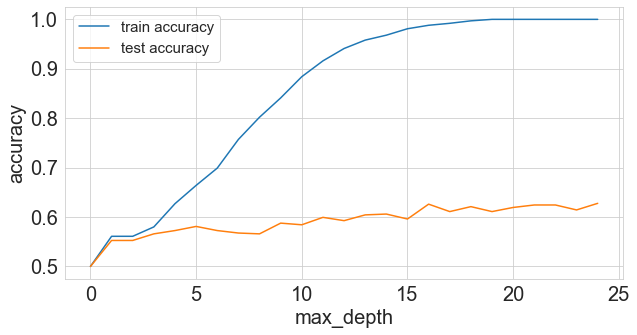

In [106]:
# create 2 plots using matlplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label = "test accuracy")
plt.legend(loc = "upper left",prop={"size":15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()